## Notebook for running fastai resnet34 training on google colab

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# hindi = 'http://physics.rutgers.edu/~jav208/datasets/DevanagariHandwrittenCharacterDataset'

In [5]:
aslData = 'http://physics.rutgers.edu/~jav208/datasets/Dataset1'
# aslData = 'https://github.com/good-soul/fuzzy-octo-guacamole/blob/main/Datasets/Dataset_2'

In [6]:
# help(untar_data)

In [8]:
path = untar_data(aslData); path

PosixPath('/root/.fastai/data/Dataset1')

In [9]:
path.ls()

[PosixPath('/root/.fastai/data/Dataset1/Test'),
 PosixPath('/root/.fastai/data/Dataset1/._.DS_Store'),
 PosixPath('/root/.fastai/data/Dataset1/.DS_Store'),
 PosixPath('/root/.fastai/data/Dataset1/Train')]

In [10]:
# path_anno = path/'annotations'
# path_img = path/'images'

path_train = path/'Train/'
path_test = path/'Test'
# path_labels = path/'labels.csv'

In [11]:
path_train.ls()

[PosixPath('/root/.fastai/data/Dataset1/Train/15'),
 PosixPath('/root/.fastai/data/Dataset1/Train/0'),
 PosixPath('/root/.fastai/data/Dataset1/Train/17'),
 PosixPath('/root/.fastai/data/Dataset1/Train/21'),
 PosixPath('/root/.fastai/data/Dataset1/Train/1'),
 PosixPath('/root/.fastai/data/Dataset1/Train/3'),
 PosixPath('/root/.fastai/data/Dataset1/Train/22'),
 PosixPath('/root/.fastai/data/Dataset1/Train/8'),
 PosixPath('/root/.fastai/data/Dataset1/Train/14'),
 PosixPath('/root/.fastai/data/Dataset1/Train/12'),
 PosixPath('/root/.fastai/data/Dataset1/Train/7'),
 PosixPath('/root/.fastai/data/Dataset1/Train/24'),
 PosixPath('/root/.fastai/data/Dataset1/Train/20'),
 PosixPath('/root/.fastai/data/Dataset1/Train/2'),
 PosixPath('/root/.fastai/data/Dataset1/Train/10'),
 PosixPath('/root/.fastai/data/Dataset1/Train/18'),
 PosixPath('/root/.fastai/data/Dataset1/Train/16'),
 PosixPath('/root/.fastai/data/Dataset1/Train/4'),
 PosixPath('/root/.fastai/data/Dataset1/Train/5'),
 PosixPath('/root/.f

In [12]:
# fnames = get_image_files(path_train/'digit_7')
# fnames[:5]

In [13]:
# help(get_transforms)
path.ls()

[PosixPath('/root/.fastai/data/Dataset1/Test'),
 PosixPath('/root/.fastai/data/Dataset1/._.DS_Store'),
 PosixPath('/root/.fastai/data/Dataset1/.DS_Store'),
 PosixPath('/root/.fastai/data/Dataset1/Train')]

In [14]:
help(ImageDataBunch.from_folder)

Help on method from_folder in module fastai.vision.data:

from_folder(path: Union[pathlib.Path, str], train: Union[pathlib.Path, str] = 'train', valid: Union[pathlib.Path, str] = 'valid', test: Union[pathlib.Path, str, NoneType] = None, valid_pct=None, seed: int = None, classes: Collection = None, **kwargs: Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from imagenet style dataset in `path` with `train`,`valid`,`test` subfolders (or provide `valid_pct`).



In [15]:
from fastai.vision.transform import get_transforms
doc(get_transforms)

In [27]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, 'Train', 'Test', ds_tfms=tfms, size=28)
# data = ImageDataBunch.from_folder(path, 'Train', 'Test', size=28)

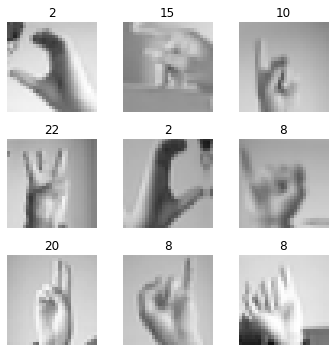

In [28]:
data.show_batch(b=2, rows=3, figsize=(5,5))

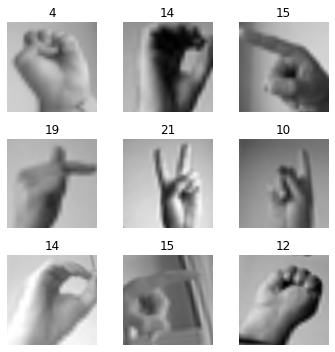

In [53]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder(path, 'Train', 'Test', ds_tfms=tfms, size=100)
data.show_batch(rows=3, figsize=(5,5))
# data.show_batch(ds_type=DatasetType.Train, rows=4, figsize=(5,5))
# ds_type=DatasetType.Train, rows=4,

In [54]:
print(data.classes)
len(data.classes),data.c

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8']


(24, 24)

In [55]:
# 100x100
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.841074,0.370055,0.878695,01:02
1,0.284816,0.089146,0.971835,01:01
2,0.135937,0.036757,0.988846,01:01
3,0.088534,0.024048,0.991913,01:01
4,0.068437,0.016369,0.995399,01:02


In [ ]:
learn.save('/content/stage-1_ASL_100_tfms')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# ls drive/MyDrive/fastai/data/ASL

## Results

In [56]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

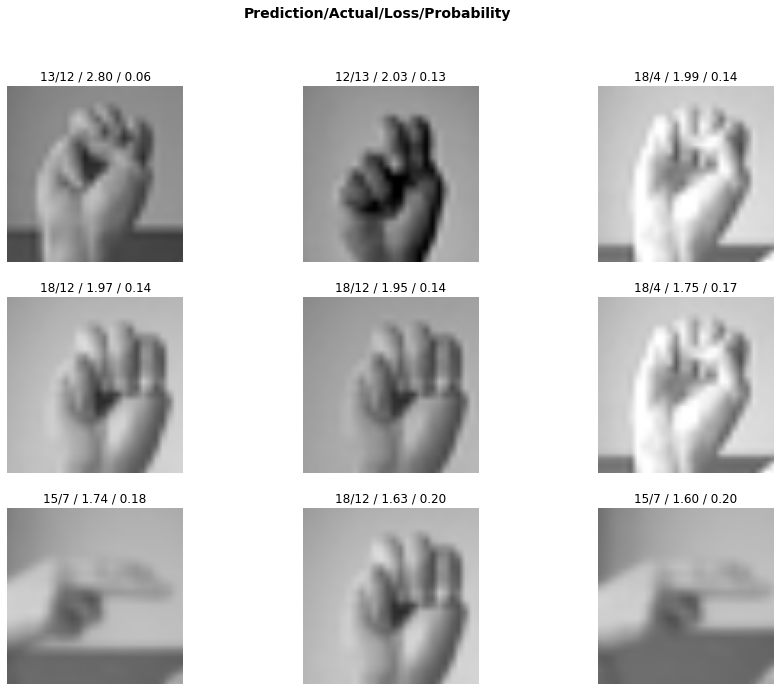

In [57]:
interp.plot_top_losses(9, figsize=(15,11))

In [58]:
# doc(interp.plot_top_losses)

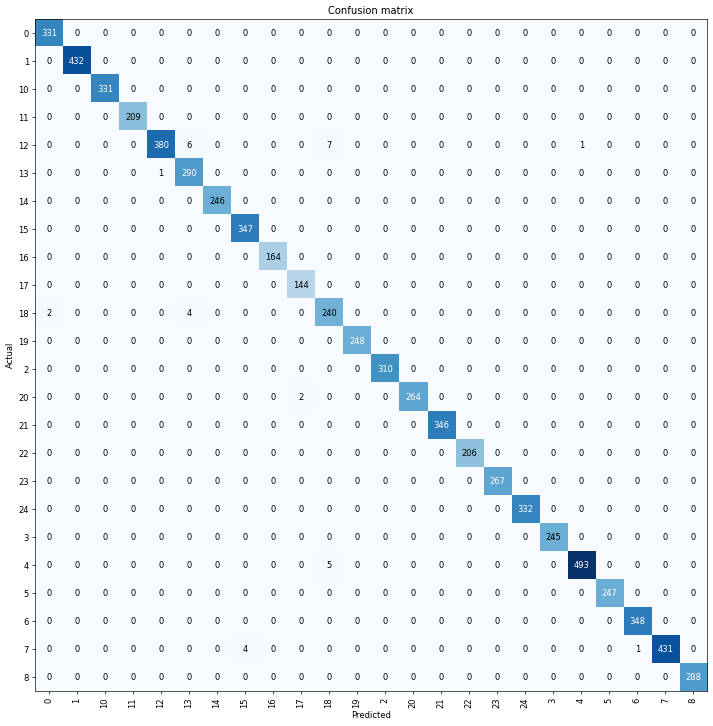

In [59]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [60]:
interp.most_confused(min_val=1)

[('12', '18', 7),
 ('12', '13', 6),
 ('4', '18', 5),
 ('18', '13', 4),
 ('7', '15', 4),
 ('18', '0', 2),
 ('20', '17', 2),
 ('12', '4', 1),
 ('13', '12', 1),
 ('7', '6', 1)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.019045,0.004435,0.997630,01:09


In [ ]:
learn.load('/content/stage-1_ASL_100_tfms');

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


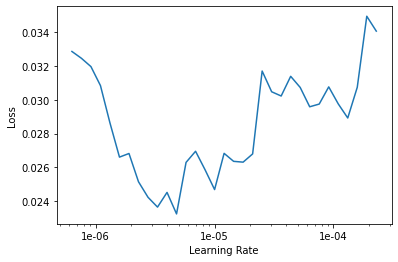

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.022371,0.000788,0.999721,01:06
1,0.015855,0.001007,0.999582,01:06
2,0.012378,0.002255,0.999163,01:06


In [ ]:
path = Path('drive/MyDrive/fastai/data/ASL/100_tfms')

In [ ]:
# learn.save('/content/stage-2_ASL_100_tfms')
learn.save(path)

In [ ]:
learn.export()

In [ ]:
ls /root/.fastai/data/Dataset1 -ll

total 85440
-rw-r--r--  1 root root  87477301 Jun  3 10:08 export.pkl
drwxr-xr-x  2 root root      4096 Jun  3 10:07 models/
drwxr-xr-x 26  501 staff     4096 May 30 06:15 Test/
drwxr-xr-x 26  501 staff     4096 May 30 06:15 Train/


In [ ]:
learn_inf = load_learner(path)

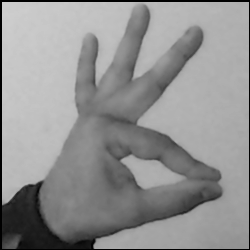

In [ ]:
img = open_image('/content/4_grayscale.png')
img

In [ ]:
pred_class,pred_idx,outputs = learn_inf.predict(img)
# pred_class
pred_idx

tensor(20)

In [ ]:
data.classes[pred_idx]

'5'

In [ ]:
# from fastai.vision.widgets import *
# btn_upload = widgets.FileUpload()
# out_pl = widgets.Output()
# lbl_pred = widgets.Label()

In [ ]:
# learn.export('/content/drive/MyDrive/fastai/data/ASL/export')
# !ls /content/drive/MyDrive/fastai/data/ASL

In [ ]:
!cp /root/.fastai/data/Dataset1/export.pkl /content/drive/MyDrive/fastai/data/ASL/100_tfms/export.pkl

In [ ]:
!ls /content/drive/MyDrive/fastai/data/ASL/100_tfms

export.pkl
